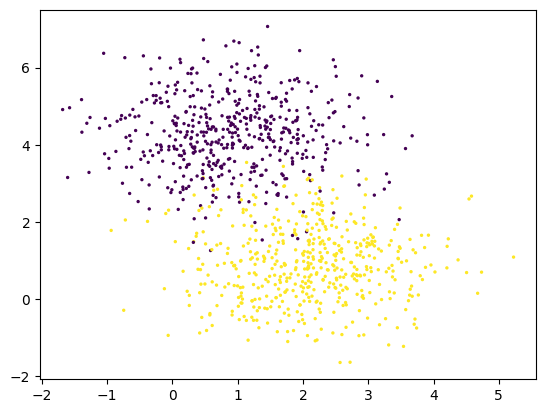

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

n_samples =1000;
np.random.seed(0)
#Data, labels = datasets.make_moons(n_samples, noise=0.10)
#Data, labels = datasets.make_circles(n_samples,factor=.5, noise=0.10)
Data, labels = datasets.make_blobs(n_samples=n_samples,centers=2, random_state=0)
plt.scatter(Data[:, 0], Data[:, 1], c=labels, s=2, cmap='viridis')


X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.2)
scores = []

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

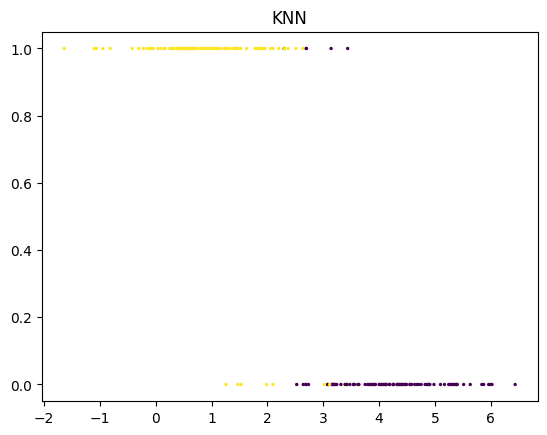

In [ ]:
y_pred1 = knn.predict(X_test)
plt.title("KNN")
plt.scatter(X_test[:,1], y_test, c=y_pred1, s=2, cmap='viridis')

In [ ]:
scores_knn = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
scores.extend(["KNN",max(scores_knn)])
print('Accuracy:', scores_knn.mean())

Accuracy: 0.9199999999999999


In [ ]:
svm = SVC(kernel='linear', C=1,probability=True)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

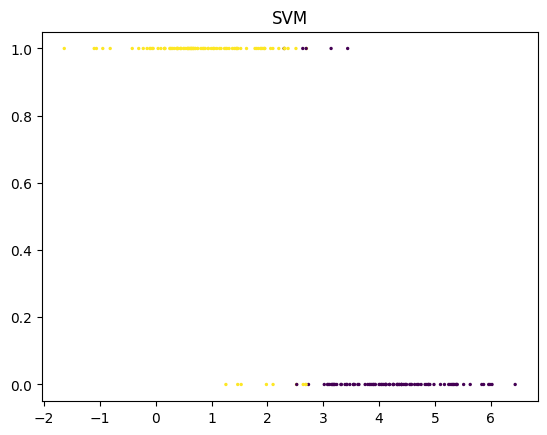

In [ ]:
y_pred2 = svm.predict(X_test)
plt.title("SVM")
plt.scatter(X_test[:,1], y_test, c=y_pred2, s=2, cmap='viridis')

In [ ]:
score_svm = cross_val_score(svm, X_test, y_test, cv=5, scoring='accuracy')
scores.extend(["svm",max(score_svm)])
print('Accuracy:', score_svm.mean())

Accuracy: 0.945


In [16]:
Preception = MLPClassifier(hidden_layer_sizes=(6,), activation='tanh')
Preception.fit(X_train, y_train)
y_pred3 = Preception.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


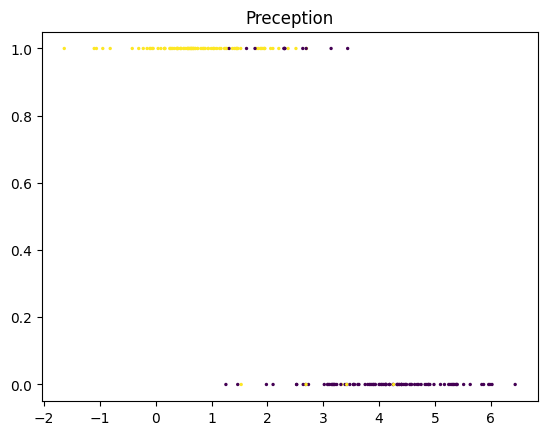

In [ ]:
plt.title("Preception")
plt.scatter(X_test[:,1], y_test, c=y_pred3, s=2, cmap='viridis')

In [ ]:
scores_Preception = cross_val_score(Preception, X_test, y_test, cv=5, scoring='accuracy')
scores.extend(["Preception",max(scores_Preception)])
print('Accuracy:', scores_Preception.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(scores)

['KNN', 0.95, 'svm', 0.975, 'Preception', 0.925]


In [ ]:
knn_pred = y_pred1.reshape((200,1))
svm_pred = y_pred2.reshape((200,1))
prcep_pred = y_pred3.reshape((200,1))

res = np.concatenate((knn_pred, svm_pred,prcep_pred),axis=1)
print(f"KNN\tSVM\tPreception\tEnsemble")
for x in res:
  for y in x:
    print(y,end="\t")
    unique, counts = np.unique(x, return_counts=True)
    index = np.argmax(counts)
  print("\t",(x[index]))

KNN	SVM	Preception	Ensemble
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	0		 1
0	0	0		 0
0	0	0		 0
0	0	0		 0
0	0	0		 0
1	1	1		 1
0	0	0		 0
0	1	1		 1
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
0	0	0		 0
0	0	0		 0
1	1	1		 1
0	0	0		 0
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
0	0	0		 0
0	0	0		 0
1	1	1		 1
0	0	0		 0
1	1	1		 1
1	0	1		 0
0	0	0		 0
0	0	0		 0
1	1	1		 1
0	0	0		 0
1	1	0		 1
1	1	1		 1
0	0	0		 0
1	1	1		 1
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	0		 1
0	0	0		 0
1	1	0		 1
1	1	1		 1
0	0	0		 0
0	0	0		 0
0	0	0		 0
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
0	0	0		 0
1	1	1		 1
0	0	0		 0
1	1	1		 1
0	0	0		 0
0	0	0		 0
0	0	0		 0
1	1	0		 1
0	0	0		 0
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	0		 1
0	1	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	0	0		 1
1	1	1		 1
1	1	1		 1
1	1	1		 1
0	0	0		 0
1	1	1		 1
1	1	1		 1
1	1	1		 1
1	1	0		 1
1	1	1		 1
0	0	0		 0
0	0	0		 0
0	0	0		 0
1	1	1		 1
0	

In [ ]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('Preception',Preception)], voting='soft', weights=[1,1,1], flatten_transform=True)
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

# print the accuracy of the ensemble model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
